In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [65]:
df=pd.read_csv("/Users/divyansh/mlprojects/house_prices.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [66]:
df_float=df.select_dtypes(include=['float64']).copy()
df_float.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotFrontage  1201 non-null   float64
 1   MasVnrArea   1452 non-null   float64
 2   GarageYrBlt  1379 non-null   float64
dtypes: float64(3)
memory usage: 34.3 KB


In [67]:
df_float

,LotFrontage,MasVnrArea,GarageYrBlt
0,65.0,196.0,2003.0
1,80.0,0.0,1976.0
2,68.0,162.0,2001.0
3,60.0,0.0,1998.0
4,84.0,350.0,2000.0
...,...,...,...
1455,62.0,0.0,1999.0
1456,85.0,119.0,1978.0
1457,66.0,0.0,1941.0
1458,68.0,0.0,1950.0


In [68]:
df_float.describe()

,LotFrontage,MasVnrArea,GarageYrBlt
count,1201.000000,1452.000000,1379.000000
mean,70.049958,103.685262,1978.506164
std,24.284752,181.066207,24.689725
min,21.000000,0.000000,1900.000000
25%,59.000000,0.000000,1961.000000
50%,69.000000,0.000000,1980.000000
75%,80.000000,166.000000,2002.000000
max,313.000000,1600.000000,2010.000000


In [69]:
df_float['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean(), inplace=False)
df_float['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mean(), inplace=False)
df_float['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean(), inplace=False)

In [70]:
df_float.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotFrontage  1460 non-null   float64
 1   MasVnrArea   1460 non-null   float64
 2   GarageYrBlt  1460 non-null   float64
dtypes: float64(3)
memory usage: 34.3 KB


In [71]:
lotFrontage=df_float[['LotFrontage']]
salePrice = df['SalePrice']

In [72]:
lr1=LinearRegression()
lr1.fit(lotFrontage,salePrice)

LinearRegression()

In [73]:
print(lr1.coef_)
print(lr1.intercept_)
print(mean_squared_error(salePrice, lr1.predict(lotFrontage)))

[1208.0155492]
96299.75696070472
5599428130.969559


In [74]:
masVnrAre = df_float[['MasVnrArea']]
salePrice = df['SalePrice']
lr2 = LinearRegression()
lr2.fit(masVnrAre, salePrice)

LinearRegression()

In [75]:
print(lr2.coef_)
print(lr2.intercept_)
print(mean_squared_error(salePrice, lr2.predict(masVnrAre)))

[209.08536998]
159242.12458511666
4882373206.33175


In [76]:
garageYrBlt = df_float[['GarageYrBlt']]
salePrice = df['SalePrice']
lr3 = LinearRegression()
lr3.fit(garageYrBlt, salePrice)

LinearRegression()

In [77]:
print(lr3.coef_)
print(lr3.intercept_)
print(mean_squared_error(salePrice, lr3.predict(garageYrBlt)))

[1556.68774577]
-2898995.104363802
4912566774.814545


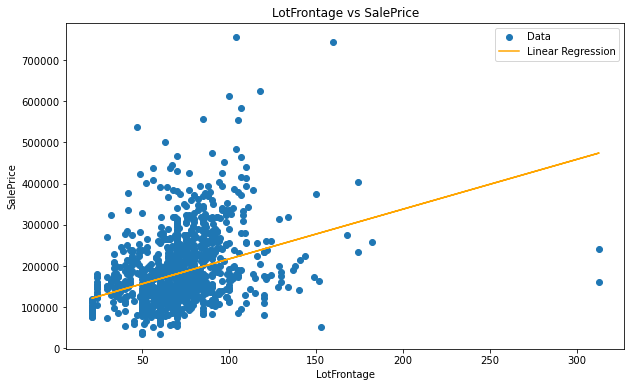

In [78]:
lotFrontage_array = lotFrontage.values.reshape(-1, 1)
# Scatter plot and regression line for LotFrontage
plt.figure(figsize=(10, 6))
plt.scatter(lotFrontage, salePrice, label='Data')
plt.plot(lotFrontage_array, lr1.predict(lotFrontage_array), color='orange', label='Linear Regression')
plt.xlabel('LotFrontage')
plt.ylabel('SalePrice')
plt.title('LotFrontage vs SalePrice')
plt.legend()
plt.show()

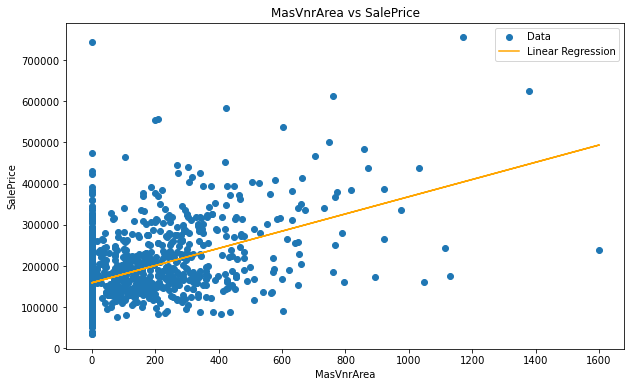

In [79]:
#masVnrAre to numpy array
masVnrAre_array = masVnrAre.values.reshape(-1, 1)
# Scatter plot and regression line for MasVnrArea
plt.figure(figsize=(10, 6))
plt.scatter(masVnrAre, salePrice, label='Data')
plt.plot(masVnrAre_array, lr2.predict(masVnrAre_array), color='orange', label='Linear Regression')
plt.xlabel('MasVnrArea')
plt.ylabel('SalePrice')
plt.title('MasVnrArea vs SalePrice')
plt.legend()
plt.show()

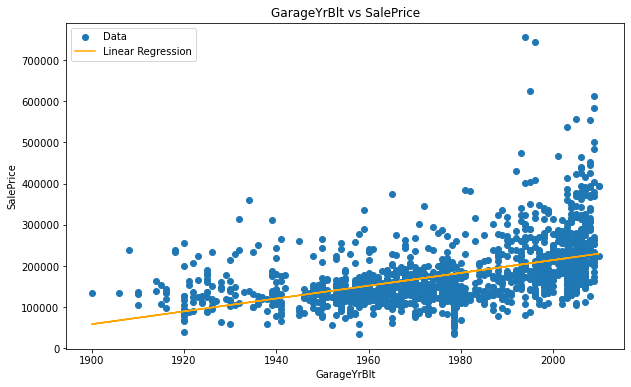

In [80]:
#garageYrBlt to numpy array
garageYrBlt_array = garageYrBlt.values.reshape(-1, 1)
# Scatter plot and regression line for GarageYrBlt
plt.figure(figsize=(10, 6))
plt.scatter(garageYrBlt, salePrice, label='Data')
plt.plot(garageYrBlt_array, lr3.predict(garageYrBlt_array), color='orange', label='Linear Regression')
plt.xlabel('GarageYrBlt')
plt.ylabel('SalePrice')
plt.title('GarageYrBlt vs SalePrice')
plt.legend()
plt.show()

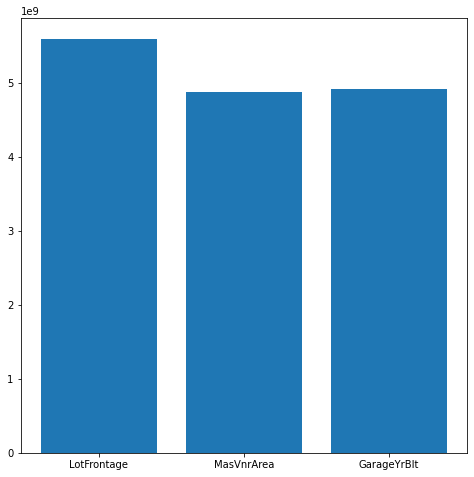

In [81]:
names = ['LotFrontage', 'MasVnrArea','GarageYrBlt']
heights = [
           mean_squared_error(salePrice, lr1.predict(lotFrontage)),
           mean_squared_error(salePrice, lr2.predict(masVnrAre)),
           mean_squared_error(salePrice, lr3.predict(garageYrBlt))]

f = plt.figure(figsize=(8,8))
ax = plt.bar(names, heights)

In [85]:
def HousePricePredict(size):
    size_2d = [[float(size)]]
    predicted_price = lr1.predict(size_2d)
    print('A %d lot frontage house should cost around: $%i' % (float(size), predicted_price[0]))

In [87]:
val = input('Enter lot frontage: ')
HousePricePredict(val)

Enter lot frontage: 65
A 65 lot frontage house should cost around: $174820


In [89]:
print ('Residual sum of squares: %.2f' % np.mean((lr1.predict(lotFrontage)- salePrice) ** 2))

Residual sum of squares: 5599428130.97
